1: 旭市
2: 市原市
3: 成田市
4: 香取市
5: 山武市

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
DIR = '../data/processed/'
clm = pd.read_csv(DIR + 'scaled_climate_df.csv')
yld = pd.read_csv(DIR + 'scaled_yield_df.csv')

In [59]:
yld

,Unnamed: 0,year,region,yield
0,0,2023,Asahi,1.412861
1,1,2022,Asahi,1.063267
2,2,2021,Asahi,1.092400
3,3,2020,Asahi,0.917603
4,4,2019,Asahi,0.043617
...,...,...,...,...
150,150,1997,Sanmu,0.095731
151,151,1996,Sanmu,-0.415682
152,152,1995,Sanmu,-0.942325
153,153,1994,Sanmu,0.059879


In [60]:
yld.drop(columns=['Unnamed: 0'], inplace=True)
yld

,year,region,yield
0,2023,Asahi,1.412861
1,2022,Asahi,1.063267
2,2021,Asahi,1.092400
3,2020,Asahi,0.917603
4,2019,Asahi,0.043617
...,...,...,...
150,1997,Sanmu,0.095731
151,1996,Sanmu,-0.415682
152,1995,Sanmu,-0.942325
153,1994,Sanmu,0.059879


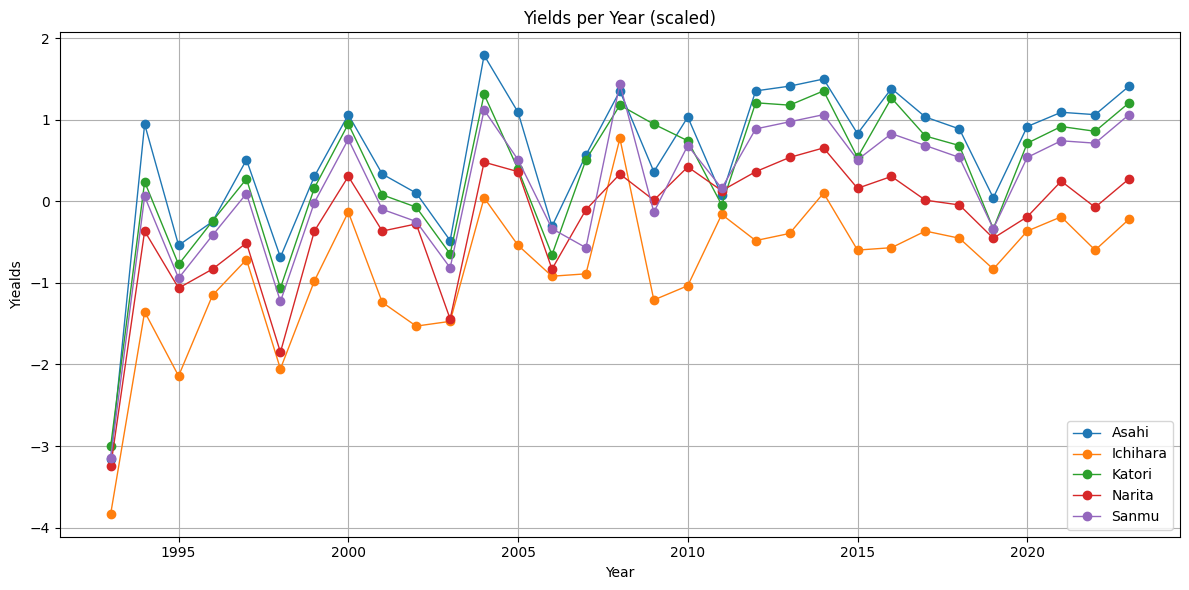

In [61]:
plt.figure(figsize=(12, 6))

for region in yld['region'].unique():
    region_data = yld[yld['region'] == region]
    plt.plot(region_data['year'], region_data['yield'], marker='o', linewidth=1, label=region)
    
plt.title('Yields per Year (scaled)')
plt.xlabel('Year')
plt.ylabel('Yiealds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
data = pd.read_csv(DIR + 'processed.csv')

data.head()

data.drop(columns=['Unnamed: 0'], inplace=True)


In [63]:
data

,region,year,prep_temp_2m,prep_soil_temp_l1,prep_soil_water_vol_l1,prep_net_solar_radiation,prep_total_rain,plnt_temp_2m,plnt_soil_temp_l1,plnt_soil_water_vol_l1,...,head_soil_temp_l1,head_soil_water_vol_l1,head_net_solar_radiation,head_total_rain,hvst_temp_2m,hvst_soil_temp_l1,hvst_soil_water_vol_l1,hvst_net_solar_radiation,hvst_total_rain,yield
0,Asahi,1993,-0.060562,-0.003973,2.238262,0.959389,0.951731,-1.572648,-1.342187,1.813258,...,-1.779114,2.890841,-1.078292,0.628321,-1.455501,-1.898463,2.120006,0.689816,-0.110071,-3.160995
1,Asahi,1994,-0.805556,-0.793434,2.159424,1.180903,0.654922,0.434492,0.458058,1.678270,...,1.193804,0.613343,1.850544,-0.119432,1.678067,1.329429,1.796030,0.005523,-0.717270,0.946735
2,Asahi,1995,-0.147400,-0.194907,1.660719,0.999355,-0.923270,-0.360754,-0.193593,2.315816,...,0.409513,0.040694,1.606052,-0.084138,0.834788,0.332058,1.697519,1.255880,-0.810901,-0.539039
3,Asahi,1996,-1.168914,-1.154994,1.389486,1.119742,-1.310899,-1.849488,-1.477762,1.341087,...,-1.806703,1.487743,0.555155,0.772871,-0.915708,-1.573629,2.101935,1.114677,-0.799842,-0.247711
4,Asahi,1997,0.584949,0.549297,1.630429,1.465555,-1.039116,0.187119,0.445647,1.697100,...,-0.633121,0.932983,0.572341,-1.211379,-0.732967,-0.969184,0.823075,3.124311,-1.237997,0.509743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Sanmu,2019,-0.196702,-0.362883,-0.571154,-0.380016,-0.625504,0.643463,0.365435,-0.605786,...,1.094681,-0.622836,0.660059,-1.007219,1.718072,1.818263,-0.537590,-0.626865,0.896926,-0.335109
151,Sanmu,2020,0.839417,0.910809,-0.322928,-0.487355,0.332045,0.910747,0.784296,-0.376874,...,1.252433,-0.815119,0.638405,-1.570382,-1.315796,-1.135402,-0.403589,-1.552317,0.623271,0.538876
152,Sanmu,2021,1.336494,1.294814,-0.720712,0.829473,-0.974916,1.286193,1.240299,-0.754766,...,-0.632906,0.155173,-1.314081,0.998547,-0.434001,-0.187704,-0.331801,0.016537,0.188167,0.742806
153,Sanmu,2022,-0.572632,-0.662868,-0.481456,-0.158865,0.330074,-0.060931,-0.257765,-0.185638,...,0.461920,-0.076307,-1.512841,-0.831394,-0.940632,-0.746253,-0.450828,-2.356662,-1.029052,0.713673


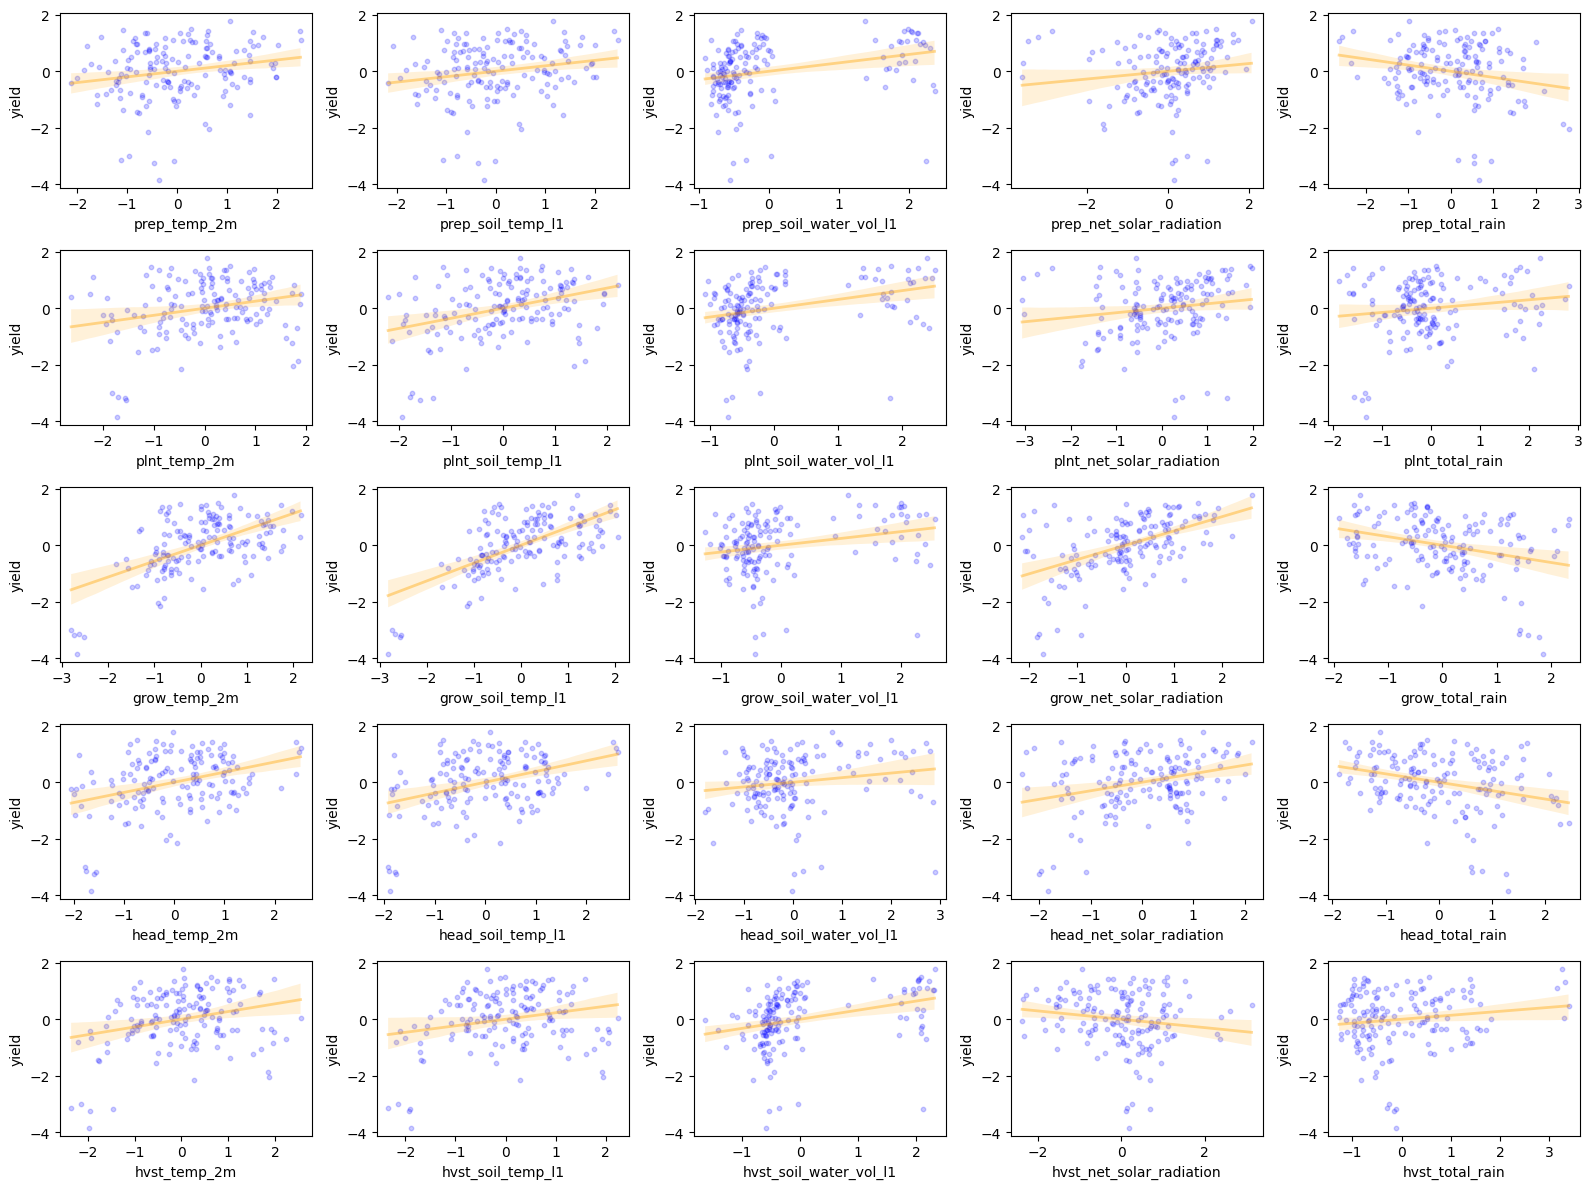

In [64]:
plt.figure(figsize=(16, 12))

cols=data.columns[2:27]

for i, col in enumerate(cols):
    plt.subplot(5, 5, i+1)
    sns.regplot(x=col, y='yield', data=data,
                scatter_kws={'color': 'blue','s': 10, 'alpha': 0.2}, 
                line_kws={'color': 'orange', 'linewidth': 2, 'alpha': 0.4})
plt.tight_layout()
plt.show()


    

In [65]:
metrics = []

In [70]:
from sklearn.model_selection import train_test_split

X = data[data.columns[2:27]]
y = data['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87, shuffle=False)


from sklearn.linear_model import LinearRegression
lrg = LinearRegression()
lrg.fit(X_train, y_train)

y_pred_lrg = lrg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_lrg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lrg)
score = r2 - rmse

print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f'Score: {score}')

RMSE: 0.49184837614306953
R2: 0.6957780862057713
Score: 0.20392971006270177


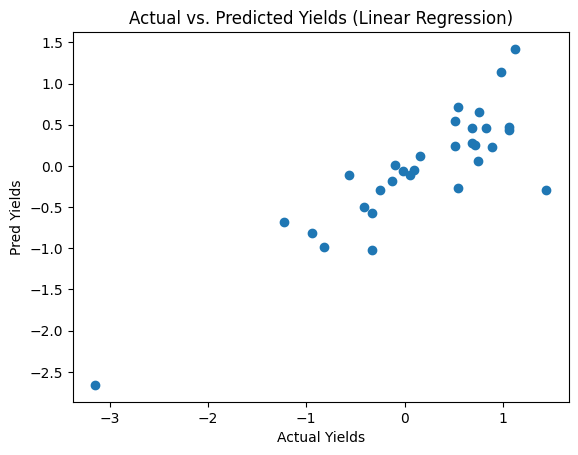

In [71]:
plt.scatter(x=y_test, y=y_pred_lrg)
plt.xlabel('Actual Yields')
plt.ylabel('Pred Yields')
plt.title('Actual vs. Predicted Yields (Linear Regression)')
plt.show()

In [68]:
metrics.append({'model': 'Linear Regression', 'rmse': rmse, 'r2': r2, 'r2-rmse': score})

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87, shuffle=False)

max_score = 0
rmse = 0
r2 = 0
SearchMethod = 0

RFC_grid = {RandomForestRegressor(): {"n_estimators": [i for i in range(1, 21)],
                                       "max_depth":[i for i in range(1, 10)],
                                       "random_state": [i for i in range(1, 21)]
                                      }}

# ランダムフォレストの実行
for model, param in RFC_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    score = r2 - rmse
    
    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        best_model = model.__class__.__name__

print("ベストスコア:{}".format(max_score))
print(f'RSME:{rmse}, R2:{r2}')
print("モデル:{}".format(best_model))
print("パラメーター:{}".format(best_param))

# ハイパーパラメータを調整しない場合との比較
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
score = r2 - rmse
print("")
print(f'RMSE={rmse} / R2={r2}')
print("デフォルトスコア:", score)

ベストスコア:0.12323839771750822
RSME:0.5272155393214513, R2:0.6504539370389595
モデル:RandomForestRegressor
パラメーター:{'max_depth': 8, 'n_estimators': 16, 'random_state': 3}

RMSE=0.5600106785503943 / R2=0.6056147834582005
デフォルトスコア: 0.0456041049078062


In [72]:
rfr = RandomForestRegressor(**best_param)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

mean_squared_error(y_test, y_pred_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rfr)
score = r2 - rmse

print(f'Score: {score}')
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

Score: 0.15860556089588995
RMSE: 0.49184837614306953
R2: 0.6504539370389595


In [73]:
metrics.append({'model': 'Random Forest', 'rmse': rmse, 'r2': r2, 'r2-rmse': score})

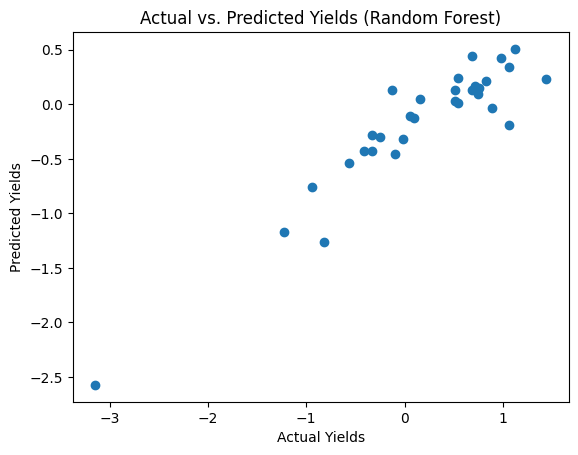

In [74]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Yields')
plt.ylabel('Predicted Yields')
plt.title('Actual vs. Predicted Yields (Random Forest)')
plt.show()

In [75]:
metrics

[{'model': 'Linear Regression',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6957780862057713,
  'r2-rmse': np.float64(0.20392971006270177)},
 {'model': 'Random Forest',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6504539370389595,
  'r2-rmse': np.float64(0.15860556089588995)}]

In [76]:
from sklearn.decomposition import KernelPCA
import numpy as np
from sklearn.model_selection import KFold

# データの準備
X = data[data.columns[2:27]]

# パラメータグリッドの定義
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
n_components_list = [3, 6, 8, 10]
gammas = np.logspace(-3, 3, 7)
degrees = [2, 3, 4]

# 結果を保存するための変数
best_score = float('-inf')
best_params = {}
results = []

# 再構成誤差を計算する関数
def compute_reconstruction_error(X, X_reconstructed):
    return -np.mean(np.sum((X - X_reconstructed) ** 2, axis=1))

# K分割交差検証
kf = KFold(n_splits=5)

# 全パラメータの組み合わせをループ
for kernel in kernels:
    for n_components in n_components_list:
        # カーネル特有のパラメータを設定
        if kernel == 'poly':
            for degree in degrees:
                print(f"Trying: kernel={kernel}, n_components={n_components}, degree={degree}")
                
                # 交差検証のスコアを保存
                cv_scores = []
                
                try:
                    # 交差検証
                    for train_idx, test_idx in kf.split(X):
                        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                        
                        # KernelPCAの初期化（多項式カーネル用）
                        kpca = KernelPCA(
                            n_components=n_components,
                            kernel=kernel,
                            degree=degree,
                            fit_inverse_transform=True
                        )
                        
                        # モデルの学習と評価
                        kpca.fit(X_train)
                        X_test_transformed = kpca.transform(X_test)
                        X_test_reconstructed = kpca.inverse_transform(X_test_transformed)
                        score = compute_reconstruction_error(X_test, X_test_reconstructed)
                        cv_scores.append(score)
                    
                    # 交差検証スコアの平均
                    mean_score = np.mean(cv_scores)
                    print(f"  Score: {mean_score}")
                    results.append({
                        'kernel': kernel,
                        'n_components': n_components,
                        'degree': degree,
                        'gamma': None,
                        'score': mean_score
                    })
                    
                    # 最高スコアの更新
                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {
                            'kernel': kernel,
                            'n_components': n_components,
                            'degree': degree,
                            'gamma': None
                        }
                except Exception as e:
                    print(f"  Error: {e}")
        
        elif kernel in ['rbf', 'sigmoid']:
            for gamma in gammas:
                print(f"Trying: kernel={kernel}, n_components={n_components}, gamma={gamma}")
                
                # 交差検証のスコアを保存
                cv_scores = []
                
                try:
                    # 交差検証
                    for train_idx, test_idx in kf.split(X):
                        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                        
                        # KernelPCAの初期化（RBF・シグモイドカーネル用）
                        kpca = KernelPCA(
                            n_components=n_components,
                            kernel=kernel,
                            gamma=gamma,
                            degree=3,  # デフォルト値を設定
                            fit_inverse_transform=True
                        )
                        
                        # モデルの学習と評価
                        kpca.fit(X_train)
                        X_test_transformed = kpca.transform(X_test)
                        X_test_reconstructed = kpca.inverse_transform(X_test_transformed)
                        score = compute_reconstruction_error(X_test, X_test_reconstructed)
                        cv_scores.append(score)
                    
                    # 交差検証スコアの平均
                    mean_score = np.mean(cv_scores)
                    print(f"  Score: {mean_score}")
                    results.append({
                        'kernel': kernel,
                        'n_components': n_components,
                        'gamma': gamma,
                        'degree': 3,
                        'score': mean_score
                    })
                    
                    # 最高スコアの更新
                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {
                            'kernel': kernel,
                            'n_components': n_components,
                            'gamma': gamma,
                            'degree': 3
                        }
                except Exception as e:
                    print(f"  Error: {e}")
        
        else:  # linear, cosine
            print(f"Trying: kernel={kernel}, n_components={n_components}")
            
            # 交差検証のスコアを保存
            cv_scores = []
            
            try:
                # 交差検証
                for train_idx, test_idx in kf.split(X):
                    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                    
                    # KernelPCAの初期化（線形・コサインカーネル用）
                    kpca = KernelPCA(
                        n_components=n_components,
                        kernel=kernel,
                        degree=3,  # デフォルト値を設定
                        fit_inverse_transform=True
                    )
                    
                    # モデルの学習と評価
                    kpca.fit(X_train)
                    X_test_transformed = kpca.transform(X_test)
                    X_test_reconstructed = kpca.inverse_transform(X_test_transformed)
                    score = compute_reconstruction_error(X_test, X_test_reconstructed)
                    cv_scores.append(score)
                
                # 交差検証スコアの平均
                mean_score = np.mean(cv_scores)
                print(f"  Score: {mean_score}")
                results.append({
                    'kernel': kernel,
                    'n_components': n_components,
                    'gamma': None,
                    'degree': 3,
                    'score': mean_score
                })
                
                # 最高スコアの更新
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {
                        'kernel': kernel,
                        'n_components': n_components,
                        'gamma': None,
                        'degree': 3
                    }
            except Exception as e:
                print(f"  Error: {e}")

# 最良のパラメータを表示
print("\n最適パラメータ:", best_params)
print("最高スコア:", best_score)

# 上位5つの結果を表示
print("\n上位5つのパラメータ組み合わせ:")
sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)
for i, result in enumerate(sorted_results[:5]):
    print(f"{i+1}. kernel={result['kernel']}, n_components={result['n_components']}, "
          f"gamma={result['gamma']}, degree={result['degree']}, score={result['score']}")

# 最適パラメータでモデルを学習
final_params = {k: v for k, v in best_params.items() if v is not None}
best_kpca = KernelPCA(
    **final_params,
    fit_inverse_transform=True
)
best_kpca.fit(X)
X_transformed = best_kpca.transform(X)

Trying: kernel=linear, n_components=3
  Score: -15.288503381051346
Trying: kernel=linear, n_components=6
  Score: -9.283791629399037
Trying: kernel=linear, n_components=8
  Score: -6.9106134388477525
Trying: kernel=linear, n_components=10
  Score: -5.374525409979914
Trying: kernel=poly, n_components=3, degree=2
  Score: -18.960694141105044
Trying: kernel=poly, n_components=3, degree=3
  Score: -19.191821748105845
Trying: kernel=poly, n_components=3, degree=4
  Score: -19.47614053429726
Trying: kernel=poly, n_components=6, degree=2
  Score: -13.680284021148747
Trying: kernel=poly, n_components=6, degree=3
  Score: -14.574683532266633
Trying: kernel=poly, n_components=6, degree=4
  Score: -16.925252969165715
Trying: kernel=poly, n_components=8, degree=2
  Score: -12.008396005085046
Trying: kernel=poly, n_components=8, degree=3
  Score: -12.701753467601602
Trying: kernel=poly, n_components=8, degree=4
  Score: -14.382069306775316
Trying: kernel=poly, n_components=10, degree=2
  Score: -11

In [77]:
X_transformed

array([[ 1.16317251,  7.28669736,  2.42895434, ..., -0.40585013,
        -0.09383149,  0.36552518],
       [ 4.32089868,  0.14243801, -2.52387939, ..., -0.99663732,
        -0.22297964, -0.12548586],
       [ 3.2270996 ,  2.05042562, -0.93665421, ...,  1.43293773,
        -0.35179611,  0.40040401],
       ...,
       [-0.44105208, -0.83364074,  1.84066058, ...,  0.20517287,
         0.65095647, -0.18468058],
       [-1.004355  , -1.53209768, -1.08398157, ..., -0.28909072,
        -0.13855926,  2.62253434],
       [-0.99719239, -6.52035101,  1.60925747, ..., -1.76358793,
        -0.71863884, -0.2107787 ]], shape=(155, 10))

In [78]:
X_pca = X_transformed
X_pca

array([[ 1.16317251,  7.28669736,  2.42895434, ..., -0.40585013,
        -0.09383149,  0.36552518],
       [ 4.32089868,  0.14243801, -2.52387939, ..., -0.99663732,
        -0.22297964, -0.12548586],
       [ 3.2270996 ,  2.05042562, -0.93665421, ...,  1.43293773,
        -0.35179611,  0.40040401],
       ...,
       [-0.44105208, -0.83364074,  1.84066058, ...,  0.20517287,
         0.65095647, -0.18468058],
       [-1.004355  , -1.53209768, -1.08398157, ..., -0.28909072,
        -0.13855926,  2.62253434],
       [-0.99719239, -6.52035101,  1.60925747, ..., -1.76358793,
        -0.71863884, -0.2107787 ]], shape=(155, 10))

In [80]:

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=87, shuffle=False)

lrg.fit(X_train_pca, y_train)
y_pred_lrg_pca = lrg.predict(X_test_pca)

r2 = r2_score(y_test, y_pred_lrg_pca)
mse = mean_squared_error(y_test, y_pred_lrg_pca)
rmse = np.sqrt(mse)
score = r2 - rmse

print(f"R2: {r2}")
print(f"RMSE: {rmse}")
print(f"Score: {score}")

R2: 0.3514685730190087
RMSE: 0.7181274174185701
Score: -0.3666588443995614


In [81]:
metrics.append({'model': 'L-Rgr PCA', 'rmse': rmse, 'r2': r2, 'r2-rmse': score})

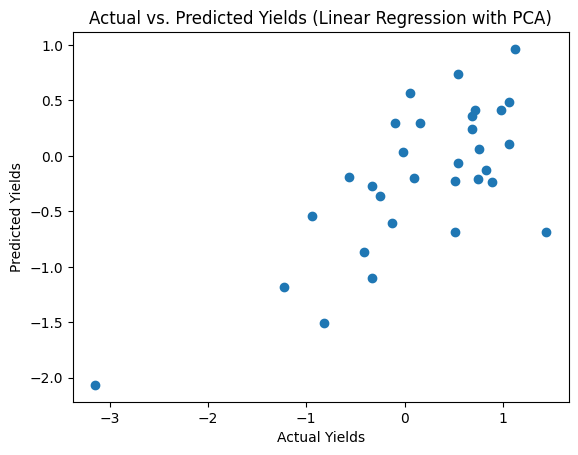

In [85]:
plt.scatter(y_test, y_pred_lrg_pca)
plt.xlabel('Actual Yields')
plt.ylabel('Predicted Yields')
plt.title('Actual vs. Predicted Yields (Linear Regression with PCA)')
plt.show()

In [ ]:
metrics.append({'model': 'L-Rgr PCA', 'rmse': rmse, 'r2': r2, 'r2-rmse': score})

[{'model': 'Linear Regression',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6957780862057713,
  'r2-rmse': np.float64(0.20392971006270177)},
 {'model': 'Random Forest',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6504539370389595,
  'r2-rmse': np.float64(0.15860556089588995)},
 {'model': 'L-Rgr PCA',
  'rmse': np.float64(0.7181274174185701),
  'r2': 0.3514685730190087,
  'r2-rmse': np.float64(-0.3666588443995614)},
 {'model': 'L-Rgr PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)}]

In [83]:
max_score = 0
rmse = 0
r2 = 0

RFC_grid = {RandomForestRegressor(): {"n_estimators": [i for i in range(1, 21)],
                                       "max_depth":[i for i in range(1, 10)],
                                       "random_state": [i for i in range(1, 21)]
                                      }}

# ランダムフォレストの実行
for model, param in RFC_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    score = r2 - rmse
    
    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        best_model = model.__class__.__name__

print("ベストスコア:{}".format(max_score))
print(f'RSME:{rmse}, R2:{r2}')
print("モデル:{}".format(best_model))
print("パラメーター:{}".format(best_param))

# ハイパーパラメータを調整しない場合との比較
rfr = RandomForestRegressor()
rfr.fit(X_train_pca, y_train)
y_pred = rfr.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
score = r2 - rmse
print("")
print(f'RMSE={rmse} / R2-{r2}')
print("デフォルトスコア:", score)

ベストスコア:0
RSME:0.8086512893601732, R2:0.17766158789898756
モデル:RandomForestRegressor
パラメーター:{'max_depth': 8, 'n_estimators': 16, 'random_state': 3}

RMSE=0.7368669968712465 / R2-0.3171800185388849
デフォルトスコア: -0.41968697833236157


In [86]:
rfr2 = RandomForestRegressor(**best_param)
rfr2.fit(X_train_pca, y_train)
y_pred_frf_pca = rfr2.predict(X_test_pca)

mean_squared_error(y_test, y_pred_frf_pca)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_frf_pca)
score = r2 - rmse

print('====== Best Scores ======')
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Score (R2 - RMSE) {score}")

====== Best Scores ======
Root Mean Squared Error: 0.7368669968712465
R-squared: 0.3453693359521639
Score (R2 - RMSE) -0.39149766091908256


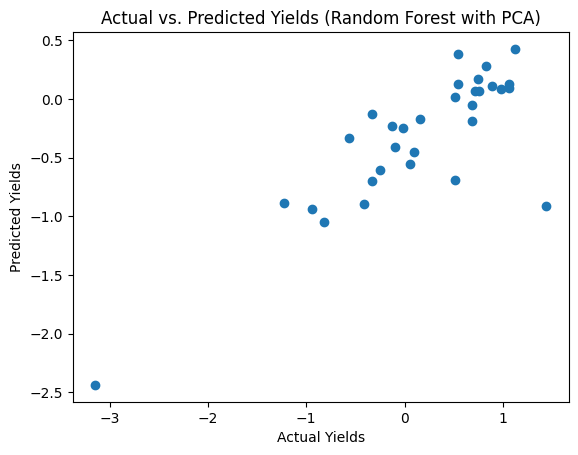

In [88]:
plt.scatter(y_test, y_pred_frf_pca)
plt.xlabel('Actual Yields')
plt.ylabel('Predicted Yields')
plt.title('Actual vs. Predicted Yields (Random Forest with PCA)')
plt.show()


In [92]:
metrics.append({'model': 'RFR PCA', 'rmse': rmse, 'r2': r2, 'r2-rmse': score})
metrics

[{'model': 'Linear Regression',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6957780862057713,
  'r2-rmse': np.float64(0.20392971006270177)},
 {'model': 'Random Forest',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6504539370389595,
  'r2-rmse': np.float64(0.15860556089588995)},
 {'model': 'L-Rgr PCA',
  'rmse': np.float64(0.7181274174185701),
  'r2': 0.3514685730190087,
  'r2-rmse': np.float64(-0.3666588443995614)},
 {'model': 'L-Rgr PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)},
 {'model': 'rfr PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)},
 {'model': 'RFR PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)}]

In [94]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_pca, y_train)
y_pred_xgb_pca = xgb.predict(X_test_pca)

mean_squared_error(y_test, y_pred_xgb_pca)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb_pca)

score = r2 - rmse

print('====== Default Scores ======')
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Score (R2 - RMSE) {score}")

====== Default Scores ======
Root Mean Squared Error: 0.7368669968712465
R-squared: 0.3649003590312465
Score (R2 - RMSE) -0.37196663783999995


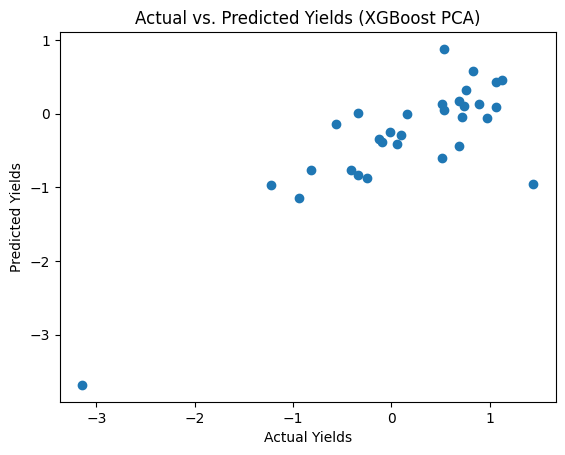

In [101]:
plt.scatter(y_test, y_pred_xgb_pca)
plt.xlabel('Actual Yields')
plt.ylabel('Predicted Yields')
plt.title('Actual vs. Predicted Yields (XGBoost PCA)')
plt.show()

In [96]:
metrics.append({'model': 'XGBoost PCA', 'rmse': rmse, 'r2': r2, 'r2-rmse': score})
metrics

[{'model': 'Linear Regression',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6957780862057713,
  'r2-rmse': np.float64(0.20392971006270177)},
 {'model': 'Random Forest',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6504539370389595,
  'r2-rmse': np.float64(0.15860556089588995)},
 {'model': 'L-Rgr PCA',
  'rmse': np.float64(0.7181274174185701),
  'r2': 0.3514685730190087,
  'r2-rmse': np.float64(-0.3666588443995614)},
 {'model': 'L-Rgr PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)},
 {'model': 'rfr PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)},
 {'model': 'RFR PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)},
 {'model': 'XGBoost PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.3649003590312465,
  'r2-rmse': np.float64(-0.371966637839

In [97]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

score = r2 - rmse

print('====== Default Scores ======')
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Score (R2 - RMSE) {score}")

====== Default Scores ======
Root Mean Squared Error: 0.7368669968712465
R-squared: 0.7341437601804424
Score (R2 - RMSE) -0.0027232366908040984


In [98]:
X = data[data.columns[2:27]]
y = data['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87, shuffle=False)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

score = r2 - rmse

print('====== Default Scores ======')
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Score (R2 - RMSE) {score}")

====== Default Scores ======
Root Mean Squared Error: 0.7368669968712465
R-squared: 0.7341437601804424
Score (R2 - RMSE) -0.0027232366908040984


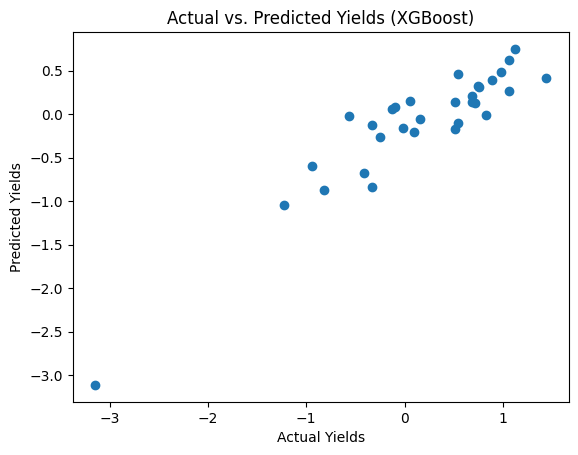

In [99]:
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual Yields')
plt.ylabel('Predicted Yields')
plt.title('Actual vs. Predicted Yields (XGBoost)')
plt.show()

In [100]:
metrics.append({'model': 'XGBoost', 'rmse': rmse, 'r2': r2, 'r2-rmse': score})
metrics

[{'model': 'Linear Regression',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6957780862057713,
  'r2-rmse': np.float64(0.20392971006270177)},
 {'model': 'Random Forest',
  'rmse': np.float64(0.49184837614306953),
  'r2': 0.6504539370389595,
  'r2-rmse': np.float64(0.15860556089588995)},
 {'model': 'L-Rgr PCA',
  'rmse': np.float64(0.7181274174185701),
  'r2': 0.3514685730190087,
  'r2-rmse': np.float64(-0.3666588443995614)},
 {'model': 'L-Rgr PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)},
 {'model': 'rfr PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)},
 {'model': 'RFR PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.7341437601804424,
  'r2-rmse': np.float64(-0.0027232366908040984)},
 {'model': 'XGBoost PCA',
  'rmse': np.float64(0.7368669968712465),
  'r2': 0.3649003590312465,
  'r2-rmse': np.float64(-0.371966637839

In [102]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,model,rmse,r2,r2-rmse
0,Linear Regression,0.491848,0.695778,0.203930
1,Random Forest,0.491848,0.650454,0.158606
2,L-Rgr PCA,0.718127,0.351469,-0.366659
3,L-Rgr PCA,0.736867,0.734144,-0.002723
4,rfr PCA,0.736867,0.734144,-0.002723
5,RFR PCA,0.736867,0.734144,-0.002723
6,XGBoost PCA,0.736867,0.364900,-0.371967
7,XGBoost,0.736867,0.734144,-0.002723
